# Project: Wrangling and Analyze Data

In [1]:
# import our libraries and packages

import pandas as pd
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests

## Data Gathering

> In the cell below, gather all three pieces of data for this project and load them in the notebook.



> Directly download the WeRateDogs Twitter archive data (twitter-archive-enhanced.csv)

In [2]:
# Loading the twitter-archive-enhanced data set

df_1 = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# Looking at the information in our data

df_1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


> Using the Requests library to download the image prediction file (image_predictions.tsv)

In [4]:
# URL downloaded programmatically

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

file = requests.get(url)

# Opening a tsv file and saving the response content

with open('image-predictions.tsv', mode='wb') as f:
    f.write(file.content)

# Loading the image_prediction data set

df_2 = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
# checking the information in the data

df_2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


> Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

>>  Tweeter is yet to deliver my API key. but in other to catch up with the project deadline, i downloaded the tweet-json.txt

In [6]:
# Extract the missing columns from enhanced twitter archive

# Loading the json file into Data Frame

df_list = []
with open('tweet-json.txt', 'r', encoding = 'utf-8') as json_file:
    for tweet_id in json_file:
        
        load_tweet = json.loads(tweet_id)
            
        tweet_id = load_tweet['id']
        favorite_count = load_tweet['favorite_count']
        retweet_count = load_tweet['retweet_count']
            
        df_list.append({'tweet_id': tweet_id,
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})
        
df_3 = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [7]:
# checking the Data set

df_3.head(5)

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Data Assessing

In this section, we will detect and document at least eight (8) quality and two (2) tidiness issues. we will use both visual sssessment and programmatic assessment to assess the data.


### Visual Assessment

Each piece of gathered data is displayed in the Jupyter Notebook for visual assesment purposes.

#####  twitter_archive columns description:

* tweet_id: the unique identifier for each tweet

* in_reply_to_status_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID

* in_reply_to_user_id: if the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s author ID

* timestamp: time when this Tweet was created

* source: utility used to post the Tweet, as an HTML-formatted string. e.g. Twitter for Android, Twitter for iPhone, Twitter Web Client

* text: actual UTF-8 text of the status update

* retweeted_status_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s ID

* retweeted_status_user_id: if the represented Tweet is a retweet, this field will contain the integer representation of the original Tweet’s author ID

* retweeted_status_timestamp: time of retweet

* expanded_urls: tweet URL

* rating_numerator: numerator of the rating of a dog. Note: ratings almost always greater than 10

* rating_denominator: denominator of the rating of a dog. Note: ratings almost always have a denominator of 10

* name: name of the dog

* doggo: one of the 4 dog "stage"

* floofer: one of the 4 dog "stage"

* pupper: one of the 4 dog "stage"

* puppo: one of the 4 dog "stageColumns description:

In [8]:
# Looking at the information in our twitter_archive data

df_1.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1495,692535307825213440,NaN,NaN,2016-01-28 02:30:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Amber. She's a Fetty Woof. 10/10 would...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692535307...,10,10,Amber,None,None,None,None
1965,673345638550134785,NaN,NaN,2015-12-06 03:38:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gerald. He's a fluffy lil yellow pup. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673345638...,7,10,Gerald,None,None,None,None
437,820078625395449857,NaN,NaN,2017-01-14 01:22:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've never wanted to go to a camp more in my e...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820078625...,12,10,None,None,None,None,None
1569,687807801670897665,NaN,NaN,2016-01-15 01:25:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Trooper &amp; Maya. Trooper protects Maya...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/687807801...,11,10,Trooper,None,None,None,None
1561,688385280030670848,NaN,NaN,2016-01-16 15:40:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louis. He's takes top-notch selfies. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/688385280...,12,10,Louis,None,None,None,None
1766,678399652199309312,NaN,NaN,2015-12-20 02:20:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This made my day. 12/10 please enjoy https://t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678399652...,12,10,None,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None
1001,747933425676525569,NaN,NaN,2016-06-28 23:23:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pls don't send more sherks. I don't care how s...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747933425...,11,10,None,None,None,None,None
115,870374049280663552,NaN,NaN,2017-06-01 20:18:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She really likes the planet. Wou...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/870374049...,13,10,Zoey,None,None,None,None


### image_prediction columns description:
    
* tweet_id: the unique identifier for each tweet

* jpg_url: dog's image URL

* img_num: the image number that corresponded to the most confident prediction (numbered 1 to 4 since tweets can have up to four images)

* p1: algorithm's #1 prediction for the image in the tweet

* p1_conf: how confident the algorithm is in its #1 prediction

* p1_dog: whether or not the #1 prediction is a breed of dog

* p2: algorithm's #2 prediction for the image in the tweet

* p2_conf: how confident the algorithm is in its #2 prediction

* p2_dog: whether or not the #2 prediction is a breed of dog

* p3: algorithm's #3 prediction for the image in the tweet

* p3_conf: how confident the algorithm is in its #3 prediction

* p3_dog: whether or not the #3 prediction is a breed of dog

In [9]:
# Looking at the information in our image_prediction data

df_2.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1687,814986499976527872,https://pbs.twimg.com/media/C09p5dJWIAE5qKL.jpg,1,dalmatian,0.999828,True,boxer,0.000068,True,American_Staffordshire_terrier,0.000034,True
1813,833479644947025920,https://pbs.twimg.com/media/C5EdT4jWEAARv2C.jpg,3,golden_retriever,0.727039,True,cocker_spaniel,0.071140,True,Tibetan_mastiff,0.048694,True
1714,818627210458333184,https://pbs.twimg.com/media/C1xZGkzWIAA8vh4.jpg,1,Labrador_retriever,0.384188,True,beagle,0.255917,True,grocery_store,0.079799,False
1664,812466873996607488,https://pbs.twimg.com/media/C0Z2T_GWgAAxbL9.jpg,1,bath_towel,0.099804,False,pillow,0.092318,False,Great_Dane,0.078205,True
961,705898680587526145,https://pbs.twimg.com/media/CcvbGj5W8AARjB6.jpg,1,collie,0.808276,True,Border_collie,0.059437,True,groenendael,0.026720,True
301,671497587707535361,https://pbs.twimg.com/media/CVGjflNWoAEwgrQ.jpg,1,swing,0.089165,False,paddle,0.080747,False,bathing_cap,0.065694,False
1843,838561493054533637,https://pbs.twimg.com/media/C6MrOsEXQAENOds.jpg,1,kelpie,0.216562,True,doormat,0.139994,False,dalmatian,0.132820,True
33,666430724426358785,https://pbs.twimg.com/media/CT-jNYqW4AAPi2M.jpg,1,llama,0.505184,False,Irish_terrier,0.104109,True,dingo,0.062071,False
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,Irish_terrier,0.153700,True,Rhodesian_ridgeback,0.068457,True
392,673580926094458881,https://pbs.twimg.com/media/CVkKRqOXIAEX83-.jpg,1,beagle,0.985062,True,basset,0.006418,True,Walker_hound,0.003533,True


### tweet_json columns description

* id: the unique identifier for each tweet

* retweet_count: the number of times the original tweet was retweeted

* favorite_count: the number of times the the original tweet was loved or liked

In [10]:
# Looking at the information in our tweet_json data

df_3.sample(10)

,tweet_id,retweet_count,favorite_count
1561,688179443353796608,669,2328
295,837366284874571778,6005,23074
825,769212283578875904,1969,5980
1809,676819651066732545,741,1957
218,850145622816686080,4244,17519
2064,671147085991960577,254,713
1081,738537504001953792,1759,5575
323,834086379323871233,2512,14296
320,834209720923721728,5476,22594
523,809220051211603969,6554,22246


### Programmatic Assessment

Using pandas' functions and/or methods to assess each gathered data.

In [11]:
# Looking at the summary of our twitter_archive data

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
# Looking at the summary of our image_prediction data

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
# Looking at the summary of our tweet_json data

df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [14]:
# Looking at the statistical description of our twitter_archive data,image_prediction data and tweet_json data

stat1 = df_1.describe()
stat2 = df_2.describe()
stat3 = df_3.describe()

In [15]:
stat1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [16]:
stat2

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [17]:
stat3

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [18]:
# Getting rows and columns number in twitter_archive dataframe

df_1.shape

(2356, 17)

In [19]:
# Getting rows and columns number in image_prediction dataframe

df_2.shape

(2075, 12)

In [20]:
# Getting rows and columns number in tweet_json dataframe

df_3.shape

(2354, 3)

In [21]:
# Getting unique values number in twitter_archive data

df_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [22]:
# Getting unique values number in image_prediction dataframe

df_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [23]:
# Getting unique values number in tweet_json dataframe

df_1.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [24]:
# Getting the missing values number in twitter_archive data

df_1.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [25]:
# Getting the missing values number in image_prediction dataframe

df_2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [26]:
# Getting the missing values number in tweet_json dataframe

df_3.isnull().sum()

tweet_id          0
retweet_count     0
favorite_count    0
dtype: int64

In [27]:
# Getting duplicate rows in our twitter_archive data

df_1.duplicated().sum()

0

In [28]:
# Getting duplicate rows in our image_prediction dataframe

df_2.duplicated().sum()

0

In [29]:
# Getting duplicate rows in our tweet_json dataframe

df_3.duplicated().sum()

0

In [30]:
# Checking the numerator rating values

df_1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [31]:
# Checking the denominator rating values

df_1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

### Quality issues

##### twitter_archive (df1_)

1)  There are tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis.


2)  incomplete records (Bo instead of Bonaparte), (an instead of Andru)


3)  wrong datatypes in the timestamp and (tweet id column is in int instead of string)


4)  retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id and in_reply_to_user_id columns  and retweeted_status_timestamp columns contain mostly missing values should be drop.


5)  missing values in expanded_urls column.


6)  empty strings should be idicated as NaN not none.

7)  values in columns 'p1', 'p2', and 'p3' don't have consistent format

8)  wrong data type (tweet id column is in int instead of string).



##### image_predictions (df_2)

9) wrong data type (tweet id column is in int instead of string).


10) Values in columns 'p1', 'p2', and 'p3' don't have consistent format (Removing the underscore in the p1, p2 and p3 column).


##### tweet_json (df_3)

11) Erroneous data type (tweet id column is in int instead of string)


### Tidiness issues

##### twitter_archive (df_1)

1) 4 columns (doggo, floofer, pupper, puppo) are categories of dog 'stage' and need to be one column 'stage' with 4 categories: doggo, floofer, pupper and puppo in it.


2) The three tables should be combined as one single dataset





## Data Cleaning

> Note: Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of tidy data. 

In [32]:
# Making a copy of the Data Set

df_1_clean = df_1.copy()

df_2_clean = df_2.copy()

df_3_clean = df_3.copy()

#### Missing Values

##### Issue #1

There are tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis.

##### Define:

Remove tweet IDs that have 'retweeted_status_id, retweeted_status_user _id, and retweeted_status _timestamp values. These ids are that of retweets and won't be used for our analysis.

##### Code:

In [33]:
# Drop retweeted rows

df_1_clean = df_1_clean[df_1_clean['retweeted_status_id'].isnull()]
df_1_clean = df_1_clean[df_1_clean['retweeted_status_user_id'].isnull()]
df_1_clean = df_1_clean[df_1_clean['retweeted_status_timestamp'].isnull()]

##### Test:

In [34]:
# Check if the retweets have been droped

print(df_1_clean.retweeted_status_id.notnull().sum())
print(df_1_clean.retweeted_status_user_id.notnull().sum())
print(df_1_clean.retweeted_status_timestamp.notnull().sum())

0
0
0




#### Incomplete Records

###### Issue #2:

incomplete records (Bo instead of Bonaparte), (an instead of Andru)


###### Define:
Replacing the (Bo with Bonaparte)and (an with Andru)

###### code:

In [35]:
# incomplete records (Bo instead of Bonaparte)

df_1_clean['name'] = df_1_clean['name'].replace('Bo','Bonaparte')

# incomplete records (an instead of Andru)

df_1_clean['name'] = df_1_clean['name'].replace('An','Andru')

##### Test:

In [36]:
df_1_clean[df_1_clean['name']== 'Bo']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
df_1_clean[df_1_clean['name']== 'An']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### Issue #3:

wrong datatypes in the timestamp and (tweet id column is in int instead of string)

##### Define:
Convert the timestamp column from an int to datetime.

##### code:



In [38]:
df_1_clean['timestamp'] = df_1_clean['timestamp'].astype('datetime64[ns]')

##### Test:

In [39]:
df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2175 non-null   int64         
 1   in_reply_to_status_id       78 non-null     float64       
 2   in_reply_to_user_id         78 non-null     float64       
 3   timestamp                   2175 non-null   datetime64[ns]
 4   source                      2175 non-null   object        
 5   text                        2175 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               2117 non-null   object        
 10  rating_numerator            2175 non-null   int64         
 11  rating_denominator          2175 non-null   int64       

#### Issue #4 and 5:

retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id and in_reply_to_user_id columns and retweeted_status_timestamp columns contain mostly missing values should be drop.

##### Define:
Drop retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp,expanded_urls, in_reply_to_status_id and in_reply_to_user_id columns because they have over 90% of missing values each


##### code:


In [40]:
# dropping out unused columns in the Data set.

df_1_clean.drop(['source','retweeted_status_timestamp','expanded_urls','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id','text'], axis = 1, inplace = True)

##### Test:

In [41]:
## Confirming the Data drop function

df_1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2175 non-null   int64         
 1   timestamp           2175 non-null   datetime64[ns]
 2   rating_numerator    2175 non-null   int64         
 3   rating_denominator  2175 non-null   int64         
 4   name                2175 non-null   object        
 5   doggo               2175 non-null   object        
 6   floofer             2175 non-null   object        
 7   pupper              2175 non-null   object        
 8   puppo               2175 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 169.9+ KB


In [42]:
# Check our cleaning effort to confirm if we no longer have missing values

df_1_clean.isnull().sum()

tweet_id              0
timestamp             0
rating_numerator      0
rating_denominator    0
name                  0
doggo                 0
floofer               0
pupper                0
puppo                 0
dtype: int64

#### Issue #6:

empty strings should be idicated as NaN not none.

##### Define:
replacing the none values as NaN not none.


##### code:


In [43]:
df_1_clean.replace('None', np.nan, inplace=True)

##### Test:

In [44]:
df_1_clean

,tweet_id,timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,5,10,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52,6,10,a,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54,9,10,a,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30,7,10,a,NaN,NaN,NaN,NaN


#### Issue #7:

values in columns 'p1', 'p2', and 'p3' don't have consistent format

##### Define:

Change all p1, p2, and p3 values to lower case.

##### code:

In [45]:
# Change the p1, p2, and p3 values all to lower case.

df_2_clean['p1'] = df_2_clean['p1'].str.lower()
df_2_clean['p2'] = df_2_clean['p2'].str.lower()
df_2_clean['p3'] = df_2_clean['p3'].str.lower()

##### Test:

In [46]:
# Display some rows to check if our cleaning effort worked

df_2_clean.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
427,674255168825880576,https://pbs.twimg.com/media/CVtvf6bWwAAd1rT.jpg,1,eskimo_dog,0.615741,True,siberian_husky,0.199544,True,malamute,0.179107,True
53,667012601033924608,https://pbs.twimg.com/media/CUG0bC0U8AAw2su.jpg,1,hyena,0.987230,False,african_hunting_dog,0.012601,False,coyote,0.000057,False
1634,805958939288408065,https://pbs.twimg.com/media/CtzKC7zXEAALfSo.jpg,1,irish_setter,0.574557,True,golden_retriever,0.339251,True,seat_belt,0.046108,False
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,weimaraner,0.291539,True,chesapeake_bay_retriever,0.278966,True,koala,0.127017,False
1589,798628517273620480,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,labrador_retriever,0.119256,True,golden_retriever,0.082549,True
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False
610,680100725817409536,https://pbs.twimg.com/media/CW-loUBWYAAn2Cb.jpg,1,golden_retriever,0.698961,True,chow,0.145971,True,pomeranian,0.034888,True
1310,754120377874386944,https://pbs.twimg.com/media/CncseIzWgAA4ghH.jpg,1,chow,0.168909,True,norfolk_terrier,0.129114,True,pomeranian,0.120822,True
1241,747103485104099331,https://pbs.twimg.com/media/Cl4-pevXEAAb8VW.jpg,1,labrador_retriever,0.991954,True,golden_retriever,0.002228,True,doormat,0.001404,False
1371,762316489655476224,https://pbs.twimg.com/media/CpRKzZKWAAABGh7.jpg,1,african_grey,0.270468,False,madagascar_cat,0.076187,False,television,0.033306,False


##### image_predictions (df_2)

#### Issue #8 and 9:

wrong data type (tweet id column is in int instead of string).

##### Define:

Convert the timestamp column from an int to datetime.

##### code:

In [47]:
# Convert tweet_id column to string

df_1_clean['tweet_id'] = df_1_clean['tweet_id'].astype(str)
df_2_clean['tweet_id'] = df_2_clean['tweet_id'].astype(str)

##### Test:

In [48]:
# Check if our cleaning effort worked

df_1_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

In [49]:
# Check if our cleaning effort worked

df_1_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

#### Issue #10:

Values in columns 'p1', 'p2', and 'p3' don't have consistent format (Removing the underscore in the p1, p2 and p3 column).

##### Define:

Replacing the underscore with space

##### code:

In [50]:
# Replacing the underscore in the p1, p2 and p3 column with space

df_2_clean['p1'] = df_2_clean['p1'].str.replace("_"," ")
df_2_clean['p2'] = df_2_clean['p2'].str.replace("_"," ")
df_2_clean['p3'] = df_2_clean['p3'].str.replace("_"," ")

##### Test:

In [51]:
df_2_clean['p1']

0       welsh springer spaniel
1                      redbone
2              german shepherd
3          rhodesian ridgeback
4           miniature pinscher
                 ...          
2070                    basset
2071               paper towel
2072                 chihuahua
2073                 chihuahua
2074                    orange
Name: p1, Length: 2075, dtype: object

In [52]:
df_2_clean['p2']

0                   collie
1       miniature pinscher
2                 malinois
3                  redbone
4               rottweiler
               ...        
2070      english springer
2071    labrador retriever
2072              malamute
2073              pekinese
2074                 bagel
Name: p2, Length: 2075, dtype: object

In [53]:
df_2_clean['p3']

0                 shetland sheepdog
1               rhodesian ridgeback
2                        bloodhound
3                miniature pinscher
4                          doberman
                   ...             
2070    german short-haired pointer
2071                        spatula
2072                         kelpie
2073                       papillon
2074                         banana
Name: p3, Length: 2075, dtype: object

##### tweet_json (df_3)

#### Issue #11:

Erroneous data type (tweet id column is in int instead of string).

##### Define:

Convert the timestamp column from an int to datetime.e

##### code:

In [54]:
# Convert tweet_id column to string

df_3_clean['tweet_id'] = df_3_clean['tweet_id'].astype(str)

##### Test:

In [55]:
df_3_clean.dtypes

tweet_id          object
retweet_count      int64
favorite_count     int64
dtype: object

#### Tidiness issues

##### Issue #1:

* 4 columns (doggo, floofer, pupper, puppo) are categories of dog 'stage' and need to be one column 'stage' with 4 categories: doggo, floofer, pupper and puppo in it.

##### Define:

Create a new variable – ‘stage’ to show the four dog stages, drop the four columns

##### code:

In [56]:
# First replace None in stage columns with empty string as follows

df_1_clean['doggo'].replace(np.NaN, '', inplace=True)
df_1_clean['floofer'].replace(np.NaN, '', inplace=True)
df_1_clean['pupper'].replace(np.NaN, '', inplace=True)
df_1_clean['puppo'].replace(np.NaN, '', inplace=True)

In [57]:
# Then combine stage columns
df_1_clean['stage'] = df_1_clean['doggo'] + df_1_clean['floofer'] + df_1_clean['pupper'] + df_1_clean['puppo']

# Then format entries with multiple dog stages which appeared like doggopuppo
df_1_clean.loc[df_1_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
df_1_clean.loc[df_1_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
df_1_clean.loc[df_1_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'


In [58]:
# Checking if entries with multiple dog stages were formatted

df_1_clean['stage'].value_counts()

                  1831
pupper             224
doggo               75
puppo               24
doggo, pupper       10
floofer              9
doggo, puppo         1
doggo, floofer       1
Name: stage, dtype: int64

In [59]:
# Drop the old columns

df_1_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [60]:
#  Use np.nan to fill the empty spaces

df_1_clean['stage'] = df_1_clean['stage'].replace('', np.nan)

##### Test:

In [61]:
df_1_clean

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,NaN
...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,5,10,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52,6,10,a,NaN
2353,666033412701032449,2015-11-15 23:21:54,9,10,a,NaN
2354,666029285002620928,2015-11-15 23:05:30,7,10,a,NaN


##### Issue #2:

The three tables should be combined as one single dataset

##### Define:

Merge the three dataframes to become one dataframe and merge them on tweet_id column

##### code:

In [62]:
# Merging the three dataframes 

complete_data = pd.merge(df_1_clean, df_2_clean, on='tweet_id', how='inner').merge(df_3_clean, on='tweet_id', how='inner' )

##### Test:

In [63]:
complete_data

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,8853,39467
1,892177421306343426,2017-08-01 00:17:27,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,6514,33819
2,891815181378084864,2017-07-31 00:18:03,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461
3,891689557279858688,2017-07-30 15:58:51,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,8964,42908
4,891327558926688256,2017-07-29 16:00:24,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,2015-11-16 00:24:50,5,10,NaN,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True,41,111
1990,666044226329800704,2015-11-16 00:04:52,6,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True,147,311
1991,666033412701032449,2015-11-15 23:21:54,9,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,47,128
1992,666029285002620928,2015-11-15 23:05:30,7,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True,48,132


In [64]:
complete_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1994 non-null   object        
 1   timestamp           1994 non-null   datetime64[ns]
 2   rating_numerator    1994 non-null   int64         
 3   rating_denominator  1994 non-null   int64         
 4   name                1448 non-null   object        
 5   stage               306 non-null    object        
 6   jpg_url             1994 non-null   object        
 7   img_num             1994 non-null   int64         
 8   p1                  1994 non-null   object        
 9   p1_conf             1994 non-null   float64       
 10  p1_dog              1994 non-null   bool          
 11  p2                  1994 non-null   object        
 12  p2_conf             1994 non-null   float64       
 13  p2_dog              1994 non-null   bool        

##### Issue #3:

dropping off the NaN values in the complete dataset

##### Define:

dropping off the NaN values

##### code:

In [65]:
# dropping off the NaN values

complete_data.dropna(inplace=True)

In [66]:
# droping off unused columns

complete_data.drop(['timestamp','p1_dog','p2_dog','p3_dog'], axis =1, inplace=True)

In [67]:
# creating the rating column by diving the rating_numerator by rating_denominator

ratings = complete_data['rating_numerator'] / complete_data['rating_denominator']

complete_data['ratings'] = ratings

In [68]:
# dropping off the other unused column of rating_numerator and rating_denominator

complete_data.drop(['rating_numerator','rating_denominator'], axis =1, inplace=True)

In [69]:
complete_data

,tweet_id,name,stage,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,ratings
9,890240255349198849,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,cardigan,0.451038,chihuahua,0.029248,7711,32467,1.4
14,889531135344209921,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden retriever,0.953442,labrador retriever,0.013834,redbone,0.007958,2321,15359,1.3
28,886366144734445568,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,french bulldog,0.999201,chihuahua,0.000361,boston bull,0.000076,3316,21524,1.2
37,884162670584377345,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,german shepherd,0.707046,malinois,0.199396,norwegian elkhound,0.049148,3128,20771,1.2
40,883360690899218434,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,tibetan mastiff,0.007099,newfoundland,0.002140,3825,22986,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,672594978741354496,Scott,pupper,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,great pyrenees,0.755945,old english sheepdog,0.082337,afghan hound,0.027037,661,1411,0.9
1647,672481316919734272,Jazz,pupper,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,border collie,0.599454,collie,0.106227,shetland sheepdog,0.094465,137,757,1.2
1654,672254177670729728,Rolf,pupper,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,pug,0.979487,french bulldog,0.016850,norwegian elkhound,0.001618,800,1515,1.1
1660,672205392827572224,Opal,pupper,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,crate,0.035376,pug,0.003267,1270,2414,0.9


## Storing Data

Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv

In [70]:
complete_data.to_csv('twitter_archive_master.csv',index=False)

In [71]:
# checking the file, if succesfully saved

cleaned_data = pd.read_csv('twitter_archive_master.csv')

In [72]:
cleaned_data

,tweet_id,name,stage,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,retweet_count,favorite_count,ratings
0,890240255349198849,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,pembroke,0.511319,cardigan,0.451038,chihuahua,0.029248,7711,32467,1.4
1,889531135344209921,Stuart,puppo,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1,golden retriever,0.953442,labrador retriever,0.013834,redbone,0.007958,2321,15359,1.3
2,886366144734445568,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,french bulldog,0.999201,chihuahua,0.000361,boston bull,0.000076,3316,21524,1.2
3,884162670584377345,Yogi,doggo,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,1,german shepherd,0.707046,malinois,0.199396,norwegian elkhound,0.049148,3128,20771,1.2
4,883360690899218434,Grizzwald,floofer,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,tibetan mastiff,0.007099,newfoundland,0.002140,3825,22986,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,672594978741354496,Scott,pupper,https://pbs.twimg.com/media/CVWJkJXWsAInlZl.jpg,1,great pyrenees,0.755945,old english sheepdog,0.082337,afghan hound,0.027037,661,1411,0.9
185,672481316919734272,Jazz,pupper,https://pbs.twimg.com/media/CVUiMUeW4AEQgkU.jpg,1,border collie,0.599454,collie,0.106227,shetland sheepdog,0.094465,137,757,1.2
186,672254177670729728,Rolf,pupper,https://pbs.twimg.com/media/CVRTmz1WcAA4uMF.jpg,1,pug,0.979487,french bulldog,0.016850,norwegian elkhound,0.001618,800,1515,1.1
187,672205392827572224,Opal,pupper,https://pbs.twimg.com/media/CVQnPMrVAAAzShR.jpg,1,carton,0.952613,crate,0.035376,pug,0.003267,1270,2414,0.9


# Data Visualisation

#### Descriptive Analysis

In [73]:
# Looking at the statistical description of our master dataset
cleaned_data.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count,ratings
count,1.890000e+02,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,7.495577e+17,1.291005,0.627052,0.133005,0.053451,3049.164021,10258.407407,1.095238
std,6.763169e+16,0.695711,0.272027,0.109939,0.050021,4694.498299,13432.819850,0.212954
min,6.721600e+17,1.000000,0.059033,0.000014,0.000006,103.000000,693.000000,0.300000
25%,6.859438e+17,1.000000,0.396984,0.039563,0.011564,844.000000,2706.000000,1.000000
50%,7.385375e+17,1.000000,0.662660,0.107405,0.039012,1744.000000,5575.000000,1.100000
75%,8.113868e+17,1.000000,0.873010,0.199482,0.083834,3472.000000,12456.000000,1.200000
max,8.902403e+17,4.000000,0.999962,0.467678,0.245653,42228.000000,106827.000000,2.700000


##### Insights:

The minimum favorite count is 66, mean is 7714, and the maximum favorite count is 144955

The minimum retweet count is 11, mean is 2245, and the maximum retweet count is 70786

About 32% of the dogs have no name

Image number 1 is the most prominent (frequent)

### Research Question 1 (Is there any relationship between retweet count and favourite count)

0.9485096799442786

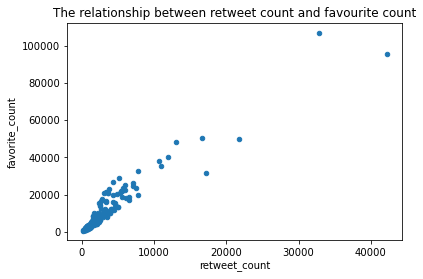

In [86]:
# Scatter plot for the relationship between retweet count and favourite count

my_color_1 = ['yellow','brown']

cleaned_data.plot(kind='scatter', x= 'retweet_count', y='favorite_count')
plt.title('The relationship between retweet count and favourite count')

# Checking for the correlation coefficient
corr = np.corrcoef(y=cleaned_data.retweet_count , x= cleaned_data.favorite_count)[0, 1]
corr

The scatter plot shows that retweet count and favourite count has a positive correlation with correlation value of 0.94. There is a strong positive linear relation between retweet_count and favorite_Count.

### Research Question 2 (What is the relationship between ratings and favourite count)

0.4125697577841633

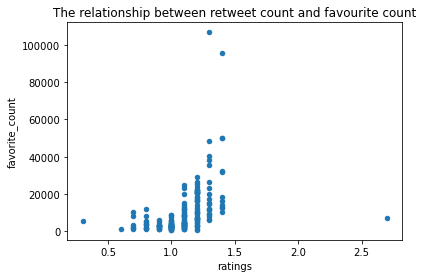

In [83]:
# Scatter plot for the relationship between ratings and favourite count

my_color_1 = ['yellow','brown']

cleaned_data.plot(kind='scatter', x= 'ratings', y='favorite_count')
plt.title('The relationship between retweet count and favourite count')

# Checking for the correlation coefficient
corr = np.corrcoef(y=cleaned_data.ratings , x= cleaned_data.favorite_count)[0, 1]
corr

### Research Question 3 (which Dog stage has the higest ratings)

Text(0.5, 0, 'Dog Stage')

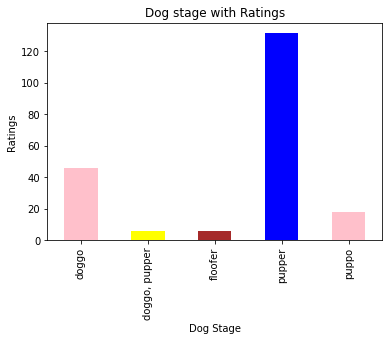

In [87]:
# Dog stage with higest favourite count

my_color = ['pink','yellow','brown','blue']

cleaned_data.groupby('stage').sum().ratings.plot(kind='bar', color=my_color)
plt.title('Dog stage with Ratings')
plt.ylabel('Ratings')
plt.xlabel('Dog Stage')

The bar chart above shows the Dog stage ratings. The chart shows that pupper dog stage has the higest ratings than the others, followed by doggo dog stage. while floofer has the lowest ratings

### Research Question 4 (Dog stage with higest favourite count)

Text(0.5, 0, 'Dog Stage')

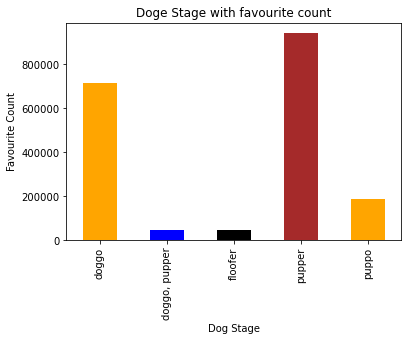

In [82]:
# Dog stage with higest favourite count

my_colors = ['orange','blue','black','brown']

cleaned_data.groupby('stage').sum().favorite_count.plot(kind='bar', color=my_colors)
plt.title('Doge Stage with favourite count')
plt.ylabel('Favourite Count')
plt.xlabel('Dog Stage')


The Bar chart above shows the Dog stage with favourite count. The chart pupper has the favourite count than others, while floofer has the lowest favorite count